In [1]:
%load_ext autoreload
%autoreload 2
# dataset loading
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearnex import patch_sklearn, config_context
patch_sklearn()
import pandas as pd
# 'os' module provides functions for interacting with the operating system 
import os
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# to suppress warnings
import warnings

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import tree
from sklearn.tree import _tree
from sklearn.base import is_classifier # 用于判断是回归树还是分类树
from dtreeviz.colors import adjust_colors # 用于分类树颜色（色盲友好模式）
import seaborn as sns #用于回归树颜色
from matplotlib.colors import Normalize # 用于标准化RGB数值
import graphviz # 插入graphviz库
import os
plt.style.use("default")
warnings.filterwarnings("ignore") 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# https://blog.csdn.net/wtySama/article/details/105316240
import matplotlib
print(matplotlib.matplotlib_fname())
# https://blog.csdn.net/jlb1024/article/details/98037525

/home/yecm/anaconda3/envs/ml/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc


In [6]:
from pathlib import Path
project_root = Path('.').resolve()
project_root

PosixPath('/home/yecm/public/Multitask-Recommendation-Library')

In [8]:
from munch import DefaultMunch, Munch
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.common.utils.utils import setup_outputdir
from autogluon.core.utils.loaders import load_pkl
from autogluon.core.utils.savers import save_pkl
from torch.utils.data import DataLoader
import os
import joblib

memory = joblib.Memory('./joblib_tmp', verbose=1)

dumb_num = 1
categorical_num, numerical_num, labels_num = (16, 63, 2)
# cate_names = [i for i in range(categorical_num)]
# numeric_names = [i for i in range(categorical_num, categorical_num+numerical_num)]
# label_names = [i for i in range(categorical_num+numerical_num, categorical_num+numerical_num+labels_num)]
print(categorical_num, numerical_num, labels_num)
@memory.cache
def get_ds():
    train_data = TabularDataset((project_root/'data/AliExpress_NL/train.csv').as_posix())
    test_data = TabularDataset((project_root/'data/AliExpress_NL/test.csv').as_posix())
    return train_data, test_data
@memory.cache
def get_processed():
    train_data, test_data = get_ds()
    train_data.drop(columns=['search_id'], inplace=True)
    test_data.drop(columns=['search_id'], inplace=True)
    cate_names = train_data.columns[:categorical_num]
    numeric_names = train_data.columns[categorical_num:categorical_num+numerical_num]
    label_names = train_data.columns[categorical_num+numerical_num:categorical_num+numerical_num+labels_num]
    def get_cated():
            return train_data[cate_names].astype('category'), test_data[cate_names].astype('category')
    train_data[cate_names], test_data[cate_names] = get_cated()
    return train_data, test_data
train_data, test_data = get_processed()
print(train_data.info())

16 63 2
________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-2596479530.get_processed...
get_processed()
________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-2596479530.get_ds...
get_ds()
_________________________________________________________get_ds - 277.0s, 4.6min
__________________________________________________get_processed - 313.0s, 5.2min
<class 'autogluon.core.dataset.TabularDataset'>
RangeIndex: 12157894 entries, 0 to 12157893
Data columns (total 81 columns):
 #   Column          Dtype   
---  ------          -----   
 0   categorical_1   category
 1   categorical_2   category
 2   categorical_3   category
 3   categorical_4   category
 4   categorical_5   category
 5   categorical_6   category
 6   categorical_7   category
 7   categorical_8   category
 8   categorical_9   category
 9   categorical_10  category
 10  categorical_11  catego

In [18]:
# train_data.head()
test_data.head()

,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,categorical_7,categorical_8,categorical_9,categorical_10,...,numerical_56,numerical_57,numerical_58,numerical_59,numerical_60,numerical_61,numerical_62,numerical_63,click,conversion
0,8,0,0,0,8,3,25,0,0,1,...,0.324986,0.107731,0,0,0,0.17614,0.0,0.0,0,0
1,8,0,0,0,8,3,25,0,0,0,...,0.613734,0.078287,0,0,0,0.53671,0.0,0.0,0,0
2,8,0,0,0,8,3,25,0,0,1,...,0.348918,0.080032,0,0,0,0.90087,0.0,0.0,0,0
3,8,0,0,0,8,3,25,0,0,1,...,0.348580,0.090378,0,0,0,0.86248,0.0,0.0,0,0
4,8,0,0,0,8,3,25,0,0,1,...,0.331759,0.094700,0,0,0,0.99996,0.0,0.0,0,0


In [12]:
cate_names = train_data.columns[:categorical_num]
numeric_names = train_data.columns[categorical_num:categorical_num+numerical_num]
label_names = train_data.columns[categorical_num+numerical_num:categorical_num+numerical_num+labels_num]
cate_names, numeric_names, label_names

(Index(['categorical_1', 'categorical_2', 'categorical_3', 'categorical_4',
        'categorical_5', 'categorical_6', 'categorical_7', 'categorical_8',
        'categorical_9', 'categorical_10', 'categorical_11', 'categorical_12',
        'categorical_13', 'categorical_14', 'categorical_15', 'categorical_16'],
       dtype='object'),
 Index(['numerical_1', 'numerical_2', 'numerical_3', 'numerical_4',
        'numerical_5', 'numerical_6', 'numerical_7', 'numerical_8',
        'numerical_9', 'numerical_10', 'numerical_11', 'numerical_12',
        'numerical_13', 'numerical_14', 'numerical_15', 'numerical_16',
        'numerical_17', 'numerical_18', 'numerical_19', 'numerical_20',
        'numerical_21', 'numerical_22', 'numerical_23', 'numerical_24',
        'numerical_25', 'numerical_26', 'numerical_27', 'numerical_28',
        'numerical_29', 'numerical_30', 'numerical_31', 'numerical_32',
        'numerical_33', 'numerical_34', 'numerical_35', 'numerical_36',
        'numerical_37', '

In [13]:
y_learn = 0
y_name = label_names[y_learn]

## 基本分析

In [ ]:
import autogluon.eda.auto as auto
auto.covariate_shift_detection(train_data=train_data, test_data=test_data, label=y_name)

In [25]:
from sklearn.model_selection import train_test_split
@memory.cache
def get_single_label():
    return train_data[label_names[0]]+train_data[label_names[1]], test_data[label_names[0]]+test_data[label_names[1]]
@memory.cache
def get_sampled():
    tr_y, te_y = get_single_label()
    _, train_data_sampled = train_test_split(train_data, test_size=0.001, stratify=tr_y, random_state=42)
    _, test_data_sampled = train_test_split(test_data, test_size=0.001, stratify=te_y, random_state=42)
    return train_data_sampled, test_data_sampled
train_data_sampled, test_data_sampled = get_sampled()

KeyboardInterrupt: 

In [20]:
len(test_data)/(len(train_data)+len(test_data))

0.3137799747646284

In [21]:
from sklearn.model_selection import train_test_split
@memory.cache
def get_concat():
    return pd.concat([train_data, test_data], ignore_index=True)
@memory.cache
def get_concated_label():
    tr_y, te_y = get_single_label()
    return pd.concat([tr_y, te_y], ignore_index=True)
@memory.cache
def get_reshuffled():
    cated = get_concat()
    y = get_concated_label()
    return train_test_split(cated, test_size=0.3, stratify=y, random_state=42)
train_data, test_data = get_reshuffled()

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3962430960.get_reshuffled...
get_reshuffled()
________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3962430960.get_concat...
get_concat()
______________________________________________________get_concat - 20.8s, 0.3min
________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3962430960.get_concated_label...
get_concated_label()
_______________________________________________get_concated_label - 0.5s, 0.0min
__________________________________________________get_reshuffled - 78.7s, 1.3min


In [28]:
@memory.cache
def get_single_label_again():
    return train_data[label_names[0]]+train_data[label_names[1]], test_data[label_names[0]]+test_data[label_names[1]]
@memory.cache
def get_sampled_again():
    tr_y, te_y = get_single_label_again()
    _, train_data_sampled = train_test_split(train_data, test_size=0.001, stratify=tr_y, random_state=42)
    _, test_data_sampled = train_test_split(test_data, test_size=0.001, stratify=te_y, random_state=42)
    return train_data_sampled, test_data_sampled
train_data_sampled, test_data_sampled = get_sampled_again()

________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3715948791.get_sampled_again...
get_sampled_again()
________________________________________________________________________________
[Memory] Calling __main__--tmp-ipykernel-3715948791.get_single_label_again...
get_single_label_again()
___________________________________________get_single_label_again - 0.5s, 0.0min


_______________________________________________get_sampled_again - 25.9s, 0.4min


In [29]:
len(train_data_sampled), len(test_data_sampled)

(12403, 5316)

In [31]:
# auto.covariate_shift_detection(train_data=train_data_sampled, test_data=test_data_sampled, label=y_name)
auto.covariate_shift_detection(train_data=train_data_sampled, test_data=test_data_sampled, label=label_names[1])
# 用来筛选是否有 id 类的 特征存在，使得 测试集和训练集中很不一样，就是id单调递增而已。

We did not detect a substantial difference between the training and test X distributions.

**`train_data` dataset summary (sample size: 10000)**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
categorical_1,10000,1,8.0,10000,,,,,,,,category,,,category,category,
categorical_10,10000,2,1.0,6818,,,,,,,,category,,,category,category,
categorical_11,10000,2,0.0,7149,,,,,,,,category,,,category,category,
categorical_12,10000,2,0.0,7413,,,,,,,,category,,,category,category,
categorical_13,10000,2,0.0,8877,,,,,,,,category,,,category,category,
categorical_14,10000,2,0.0,8894,,,,,,,,category,,,category,category,
categorical_15,10000,2,1.0,5432,,,,,,,,category,,,category,category,
categorical_16,10000,2,0.0,9930,,,,,,,,category,,,category,category,
categorical_2,10000,4,0.0,9129,,,,,,,,category,,,category,category,
categorical_3,10000,7,0.0,7971,,,,,,,,category,,,category,category,


**`test_data` dataset summary (sample size: 10000)**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
categorical_1,10000,1,8.0,10000,,,,,,,,category,,,category,category,
categorical_10,10000,2,1.0,6801,,,,,,,,category,,,category,category,
categorical_11,10000,2,0.0,7095,,,,,,,,category,,,category,category,
categorical_12,10000,2,0.0,7512,,,,,,,,category,,,category,category,
categorical_13,10000,2,0.0,8909,,,,,,,,category,,,category,category,
categorical_14,10000,2,0.0,8895,,,,,,,,category,,,category,category,
categorical_15,10000,2,1.0,5374,,,,,,,,category,,,category,category,
categorical_16,10000,2,0.0,9947,,,,,,,,category,,,category,category,
categorical_2,10000,4,0.0,9213,,,,,,,,category,,,category,category,
categorical_3,10000,7,0.0,8038,,,,,,,,category,,,category,category,


### Feature Distance

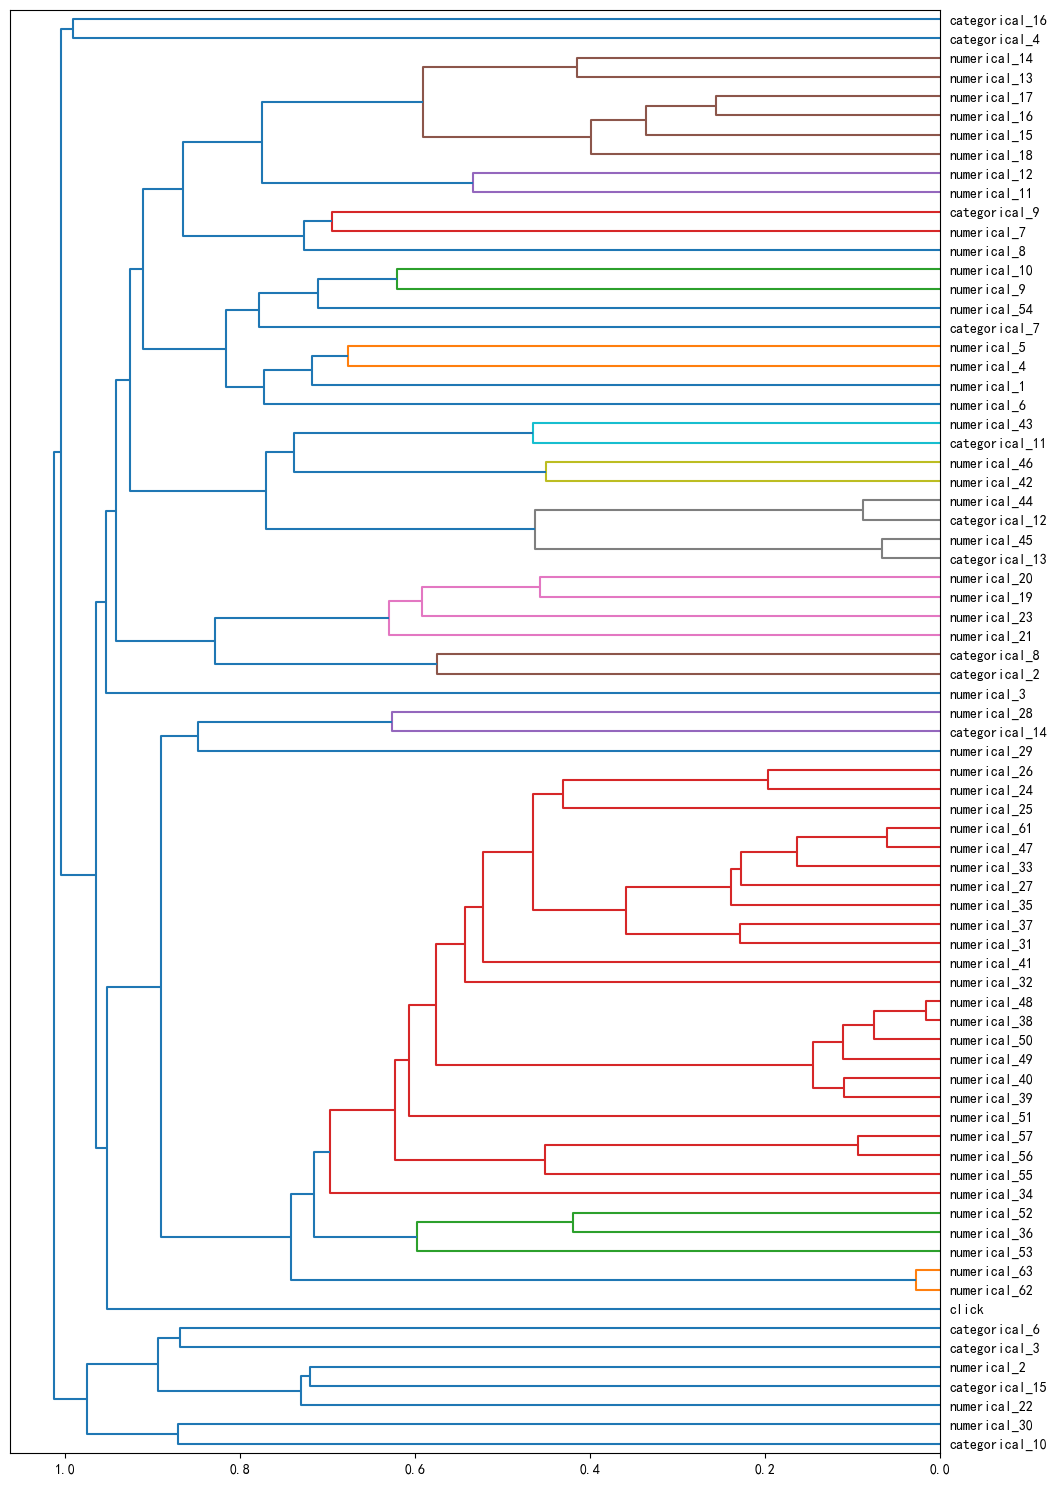

In [34]:
auto.dataset_overview(train_data=train_data, test_data=test_data, label=y_name)

## Target variable analysis

### Label Insights

 - Moderate minority class imbalance detected - imbalance ratio is `2.15%`. Recommendations:
   - downsample majority class `0` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
click,10000,0.021,0.143391,0.0,0.0,0.0,0.0,1.0,int64,2,,,int,


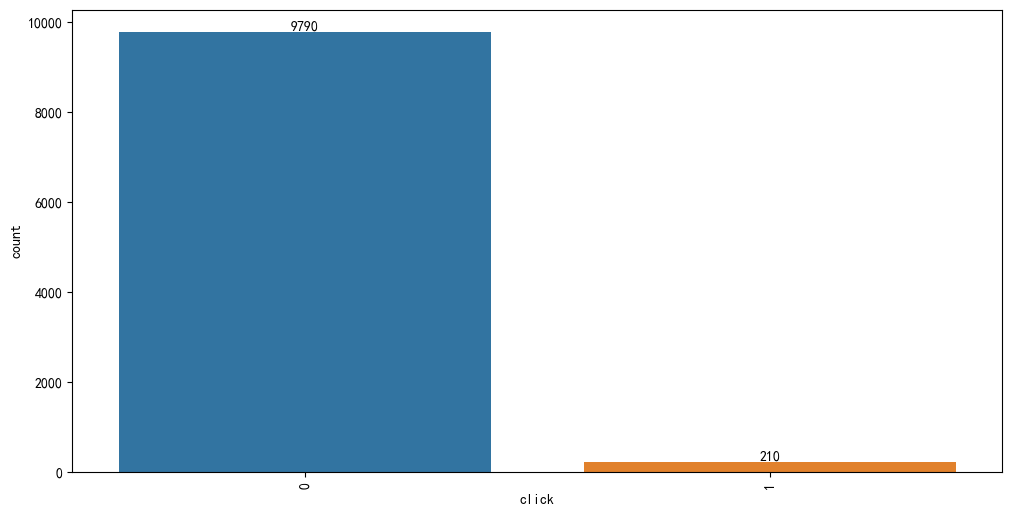

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `click`.

No path specified. Models will be saved in: "AutogluonModels/ag-20230801_152114/"


### Model Prediction for click

Using validation data for `Test` points

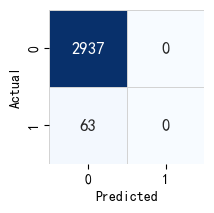

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.979,0.978571,0.002428,0.002805,1.253037,0.002428,0.002805,1.253037,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
numerical_1,0.0,0.0,0.5,5,0.0,0.0
numerical_2,0.0,0.0,0.5,5,0.0,0.0
numerical_33,0.0,0.0,0.5,5,0.0,0.0
numerical_34,0.0,0.0,0.5,5,0.0,0.0
numerical_35,0.0,0.0,0.5,5,0.0,0.0
numerical_36,0.0,0.0,0.5,5,0.0,0.0
numerical_37,0.0,0.0,0.5,5,0.0,0.0
numerical_38,0.0,0.0,0.5,5,0.0,0.0
numerical_39,0.0,0.0,0.5,5,0.0,0.0
numerical_40,0.0,0.0,0.5,5,0.0,0.0


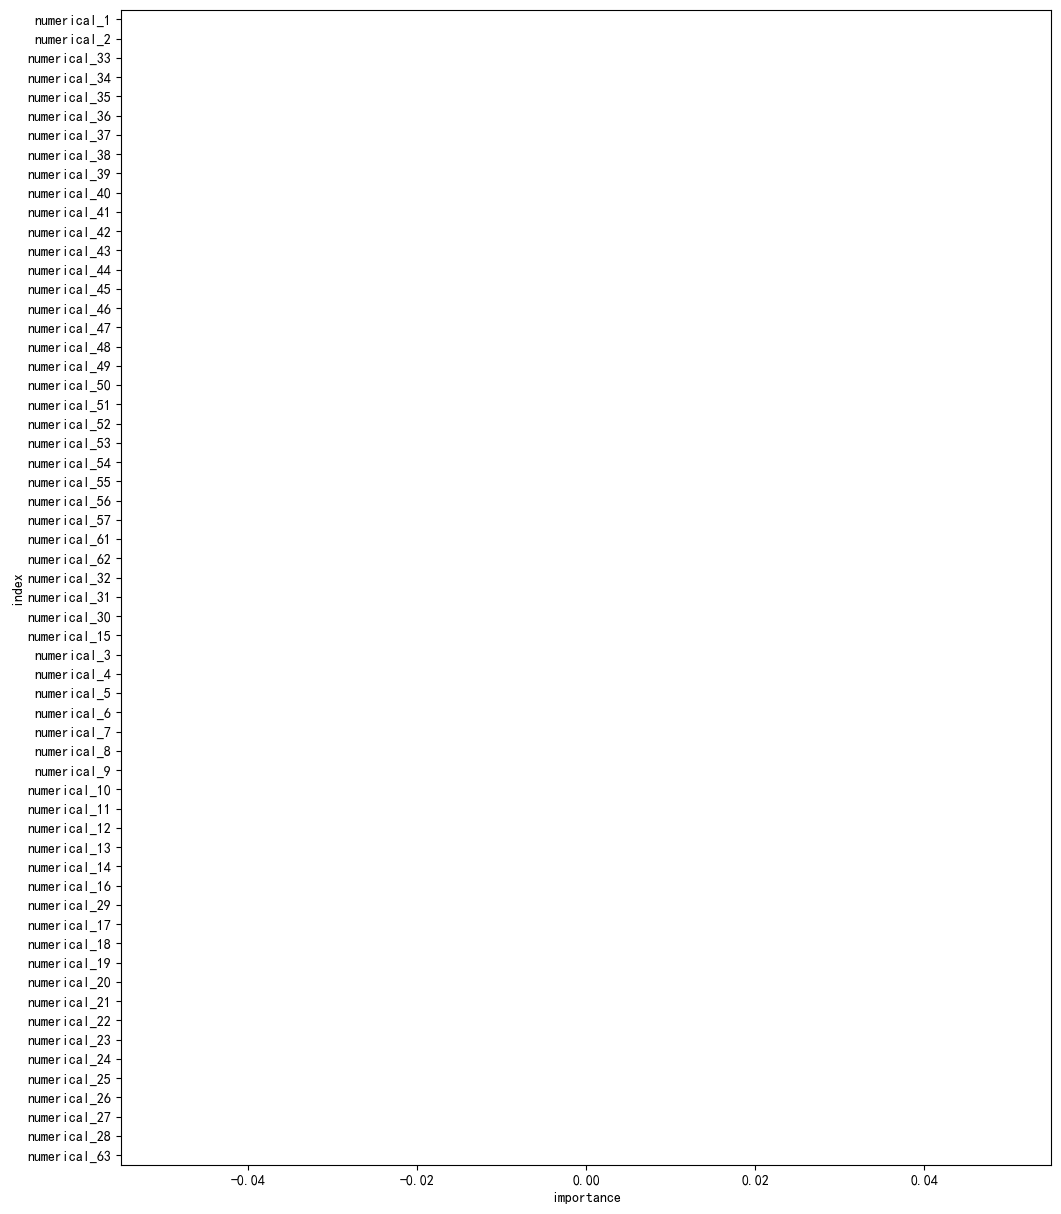

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,numerical_1,numerical_2,numerical_3,numerical_4,numerical_5,numerical_6,numerical_7,numerical_8,numerical_9,numerical_10,...,numerical_58,numerical_59,numerical_60,numerical_61,numerical_62,numerical_63,click,0,1,error
1239,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.558800,0.138700,...,0,0,0,0.96172,0.278998,0.494725,1,0.980070,0.019930,0.960140
5667,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.625000,0.250000,0.010000,0.044000,...,0,0,0,0.44337,0.000000,0.000000,1,0.980070,0.019930,0.960140
6371,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.100400,0.217700,...,0,0,0,0.99230,0.523501,0.518435,1,0.980070,0.019930,0.960140
6436,1.0,0.011364,0.045455,1.000000,0.111111,0.000000,0.111111,0.111111,0.193400,0.049950,...,0,0,0,0.29001,0.000000,0.000000,1,0.980070,0.019930,0.960140
4876,1.0,0.000000,0.000000,1.000000,0.142857,0.000000,0.285714,0.000000,0.306600,0.087500,...,0,0,0,0.73702,0.532585,0.615414,1,0.980070,0.019930,0.960140
1797,0.0,1.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.199500,0.117200,...,0,0,0,0.42380,0.000000,0.000000,1,0.980070,0.019930,0.960140
8759,0.0,1.000000,0.000000,0.000000,1.000000,0.125000,0.000000,0.000000,0.169200,0.176100,...,0,0,0,0.07348,0.000000,0.000000,1,0.980070,0.019930,0.960140
9912,1.0,0.000000,0.000000,0.285714,1.000000,0.142857,0.000000,0.571429,0.246100,0.246400,...,0,0,0,0.38013,0.000000,0.000000,1,0.980070,0.019930,0.960140
8586,0.0,1.000000,0.000000,1.000000,0.666667,0.333333,0.000000,0.333333,0.161690,0.129850,...,0,0,0,0.17614,0.305800,0.415718,1,0.980070,0.019930,0.960140
4846,0.0,1.000000,0.000000,0.250000,0.250000,1.000000,0.750000,0.000000,0.206833,0.127544,...,0,0,0,0.00000,0.000000,0.000000,1,0.979658,0.020342,0.959316


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,numerical_1,numerical_2,numerical_3,numerical_4,numerical_5,numerical_6,numerical_7,numerical_8,numerical_9,numerical_10,...,numerical_58,numerical_59,numerical_60,numerical_61,numerical_62,numerical_63,click,0,1,error
3802,0.00,0.000000,1.00,1.000000,1.000000,1.000000,1.000000,0.000000,0.527300,0.209100,...,0,0,0,0.88696,0.556099,0.492562,1,0.967022,0.032978,0.934043
8186,0.25,1.000000,0.25,0.000000,1.000000,0.000000,1.000000,0.500000,0.178300,0.062600,...,0,0,0,0.71243,0.000000,0.000000,1,0.967022,0.032978,0.934043
8193,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.115390,0.081250,...,0,0,0,1.00000,0.627481,0.562336,1,0.967022,0.032978,0.934043
9883,1.00,0.250000,0.00,0.400000,1.000000,0.400000,0.200000,0.000000,0.429500,0.291600,...,0,0,0,0.62468,0.177103,0.255157,1,0.968663,0.031337,0.937326
1506,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.143700,0.119000,...,0,0,0,1.00000,0.689407,0.707799,1,0.973162,0.026838,0.946323
3088,0.25,1.000000,0.00,0.142857,0.285714,0.428571,1.000000,0.428571,0.270200,0.098500,...,0,0,0,0.92434,0.717425,0.728464,1,0.973835,0.026165,0.947671
319,1.00,0.066667,0.00,0.000000,0.000000,0.750000,1.000000,0.250000,0.219867,0.150467,...,0,0,0,0.56321,0.113464,0.269787,1,0.974390,0.025610,0.948780
4788,1.00,0.428571,0.00,0.400000,0.000000,0.400000,1.000000,0.000000,0.098600,0.107000,...,0,0,0,0.03674,0.000000,0.000000,1,0.974390,0.025610,0.948780
2669,0.00,1.000000,0.00,1.000000,0.333333,0.333333,0.333333,0.000000,0.170467,0.125622,...,0,0,0,0.28060,0.000000,0.000000,1,0.974390,0.025610,0.948780
3576,1.00,0.000000,0.00,1.000000,0.200000,0.000000,0.100000,0.000000,0.195160,0.150680,...,0,0,0,1.00000,0.527402,0.449833,1,0.974390,0.025610,0.948780


## Target variable analysis

### Label Insights

 - Low-cardinality classes are detected. It is recommended to have at least `50` instances per class. Consider adding more data to cover the classes or remove such rows.
   - class `1`: `7` instances
 - Extreme minority class imbalance detected - imbalance ratio is `0.07%`. Recommendations:
   - downsample majority class `0` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
conversion,10000,0.0007,0.02645,0.0,0.0,0.0,0.0,1.0,int64,2,,,int,


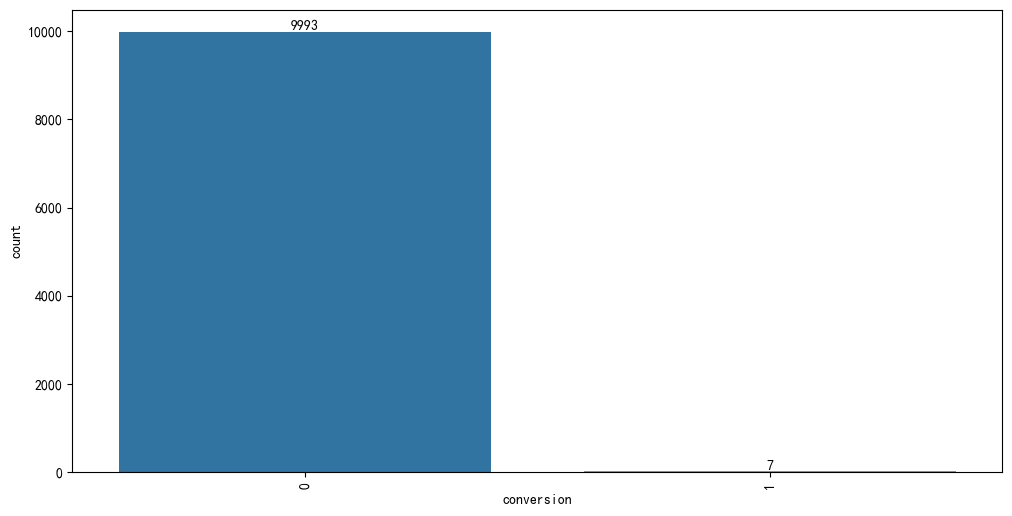

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `conversion`.

No path specified. Models will be saved in: "AutogluonModels/ag-20230801_152128/"


### Model Prediction for conversion

Using validation data for `Test` points

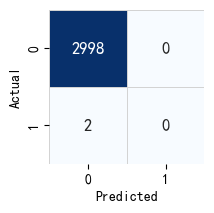

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.999333,1.0,0.00235,0.002824,0.830635,0.00235,0.002824,0.830635,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
numerical_1,0.0,0.0,0.5,5,0.0,0.0
numerical_2,0.0,0.0,0.5,5,0.0,0.0
numerical_33,0.0,0.0,0.5,5,0.0,0.0
numerical_34,0.0,0.0,0.5,5,0.0,0.0
numerical_35,0.0,0.0,0.5,5,0.0,0.0
numerical_36,0.0,0.0,0.5,5,0.0,0.0
numerical_37,0.0,0.0,0.5,5,0.0,0.0
numerical_38,0.0,0.0,0.5,5,0.0,0.0
numerical_39,0.0,0.0,0.5,5,0.0,0.0
numerical_40,0.0,0.0,0.5,5,0.0,0.0


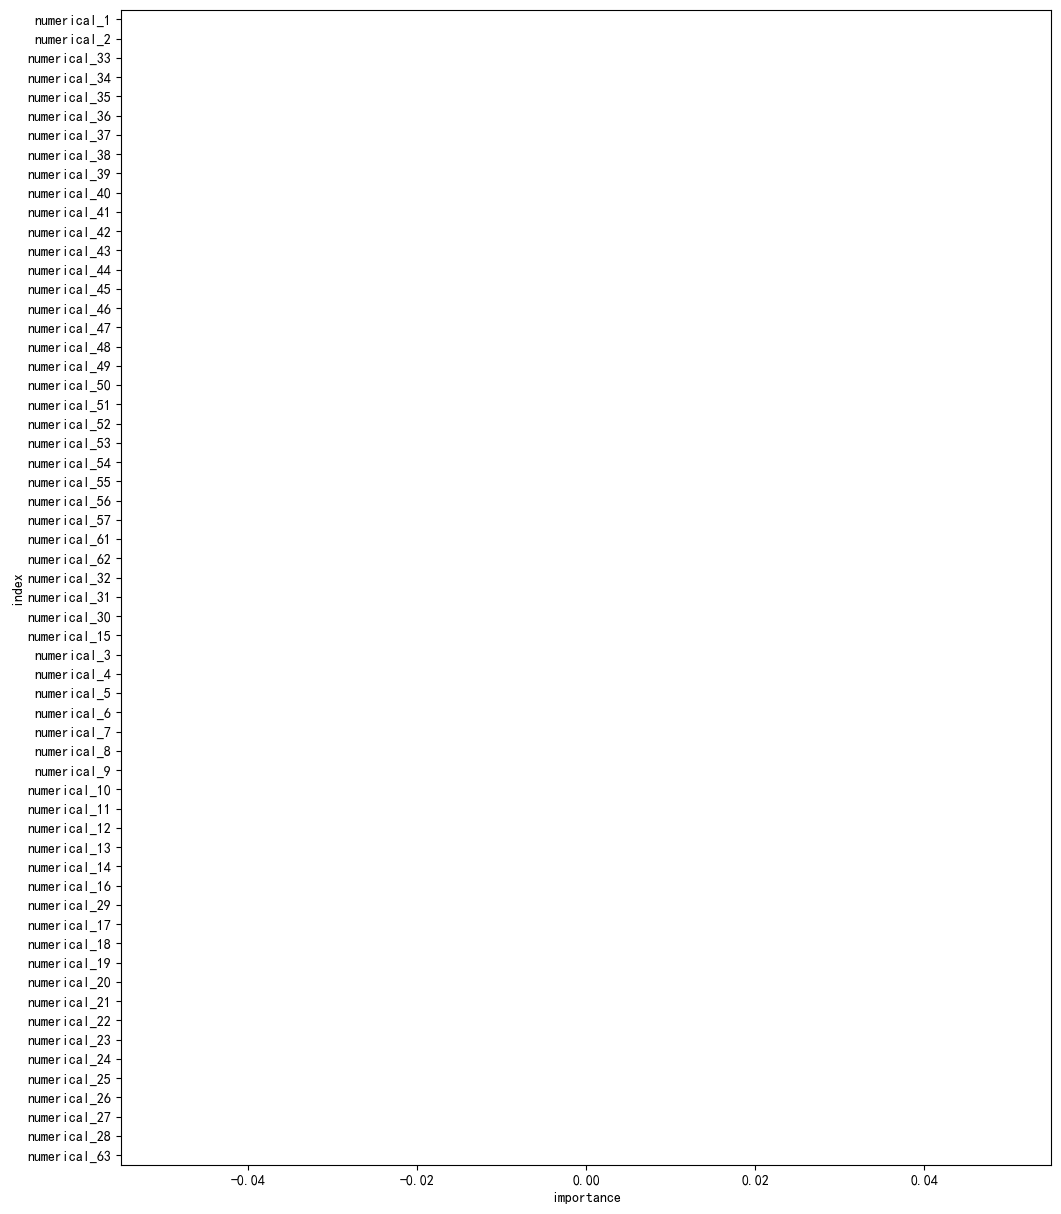

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,numerical_1,numerical_2,numerical_3,numerical_4,numerical_5,numerical_6,numerical_7,numerical_8,numerical_9,numerical_10,...,numerical_58,numerical_59,numerical_60,numerical_61,numerical_62,numerical_63,conversion,0,1,error
429,0.0,0.0,1.0,0.0,1.0,1.0,0.5,0.0,0.0807,0.3262,...,0,0,0,0.03674,0.000000,0.000000,1,0.999245,0.000755,0.99849
2450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,...,0,0,0,0.30129,0.417056,0.435749,1,0.999245,0.000755,0.99849


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,numerical_1,numerical_2,numerical_3,numerical_4,numerical_5,numerical_6,numerical_7,numerical_8,numerical_9,numerical_10,...,numerical_58,numerical_59,numerical_60,numerical_61,numerical_62,numerical_63,conversion,0,1,error
429,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,0.000000,0.08070,0.32620,...,0,0,0,0.03674,0.000000,0.000000,1,0.999245,0.000755,0.99849
2450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0,0,0,0.30129,0.417056,0.435749,1,0.999245,0.000755,0.99849
2632,1.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000,0.000000,0.14590,0.12145,...,0,0,0,0.07348,0.472204,0.288817,0,0.999245,0.000755,NaN
6077,0.000000,1.000000,0.000000,0.333333,1.000000,0.333333,0.666667,0.000000,0.21710,0.23670,...,0,0,0,0.96594,0.445581,0.603129,0,0.999245,0.000755,NaN
270,1.000000,0.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.22326,0.14282,...,0,0,0,0.00000,0.000000,0.000000,0,0.999245,0.000755,NaN
9636,0.500000,1.000000,0.166667,1.000000,0.666667,0.666667,0.333333,0.333333,0.04050,0.02900,...,0,0,0,0.99974,0.366457,0.356616,0,0.999245,0.000755,NaN
6330,0.000000,1.000000,0.000000,0.333333,0.666667,0.333333,1.000000,0.333333,0.20510,0.08520,...,0,0,0,0.07348,0.000000,0.000000,0,0.999245,0.000755,NaN
6513,1.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,1.000000,0.23100,0.26190,...,0,0,0,1.00000,0.000000,0.000000,0,0.999245,0.000755,NaN
8606,0.090909,0.454545,1.000000,0.666667,0.666667,1.000000,0.333333,0.000000,0.02420,0.19480,...,0,0,0,0.00000,0.000000,0.000000,0,0.999245,0.000755,NaN
5050,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.16090,0.13540,...,0,0,0,0.07308,0.331758,0.285894,0,0.999245,0.000755,NaN


In [35]:
import autogluon.eda.auto as auto
for i in range(2):
    y_name = label_names[i]
    other_name = label_names[1-i]
    auto.target_analysis(train_data=train_data[list(numeric_names)+[y_name]], label=y_name)
    state = auto.quick_fit(
        train_data[list(numeric_names)+[y_name]], 
        y_name, 
        return_state=True,
        show_feature_importance_barplots=True
    )

This visualization will render 64 charts. This can take a while. This warning can be disabled by setting `col_number_warning` to a higher value.
No path specified. Models will be saved in: "AutogluonModels/ag-20230801_152557/"


### Partial Dependence Plots

Individual Conditional Expectation (ICE) plots complement Partial Dependence Plots (PDP) by showing the relationship between a feature and the model's output for each individual instance in the dataset. ICE lines (blue) can be overlaid on PDPs (red) to provide a more detailed view of how the model behaves for specific instances. Here are some points on how to interpret PDPs with ICE lines:

* **Central tendency**: The PDP line represents the average prediction for different values of the feature of interest. Look for the overall trend of the PDP line to understand the average effect of the feature on the model's output.
* **Variability**: The ICE lines represent the predicted outcomes for individual instances as the feature of interest changes. Examine the spread of ICE lines around the PDP line to understand the variability in predictions for different instances.
* **Non-linear relationships**: Look for any non-linear patterns in the PDP and ICE lines. This may indicate that the model captures a non-linear relationship between the feature and the model's output.
* **Heterogeneity**: Check for instances where ICE lines have widely varying slopes, indicating different relationships between the feature and the model's output for individual instances. This may suggest interactions between the feature of interest and other features.
* **Outliers**: Look for any ICE lines that are very different from the majority of the lines. This may indicate potential outliers or instances that have unique relationships with the feature of interest.
* **Confidence** intervals: If available, examine the confidence intervals around the PDP line. Wider intervals may indicate a less certain relationship between the feature and the model's output, while narrower intervals suggest a more robust relationship.
* **Interactions**: By comparing PDPs and ICE plots for different features, you may detect potential interactions between features. If the ICE lines change significantly when comparing two features, this might suggest an interaction effect.

<sub><sup>Use `show_help_text=False` to hide this information when calling this function.</sup></sub>

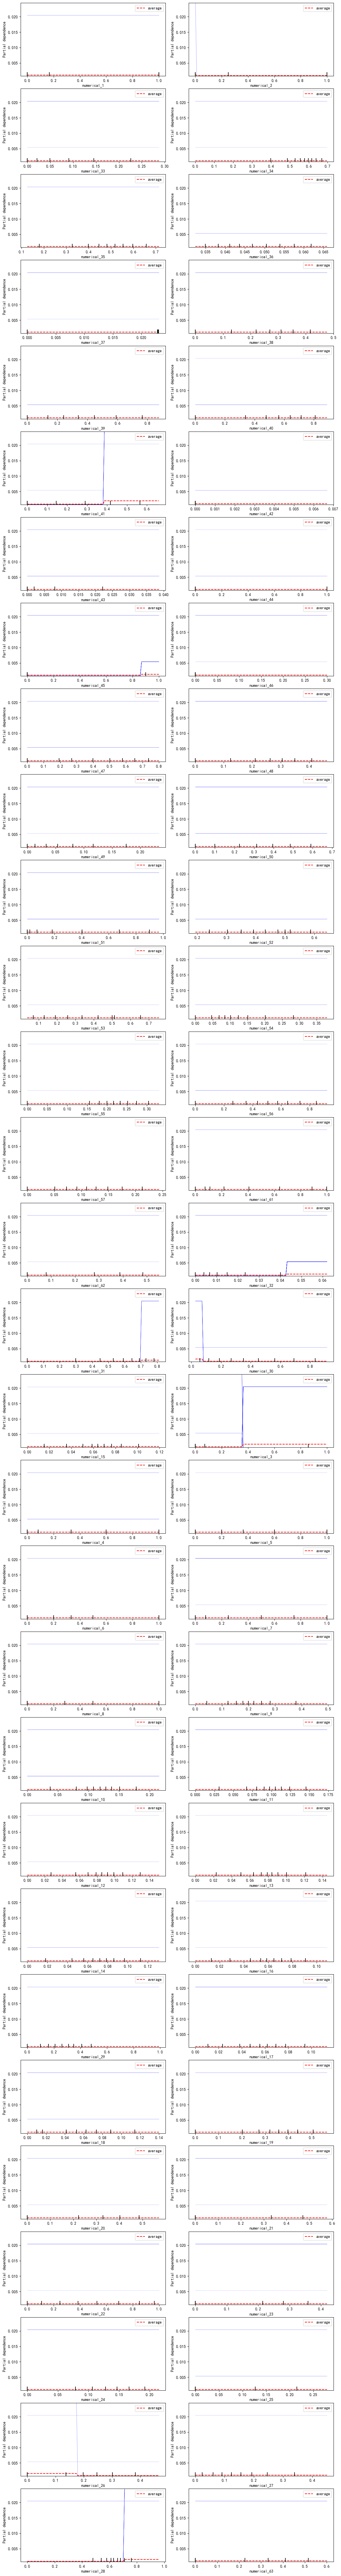

In [38]:
state = auto.partial_dependence_plots(train_data_sampled[list(numeric_names)+[y_name]], label=y_name, return_state=True)

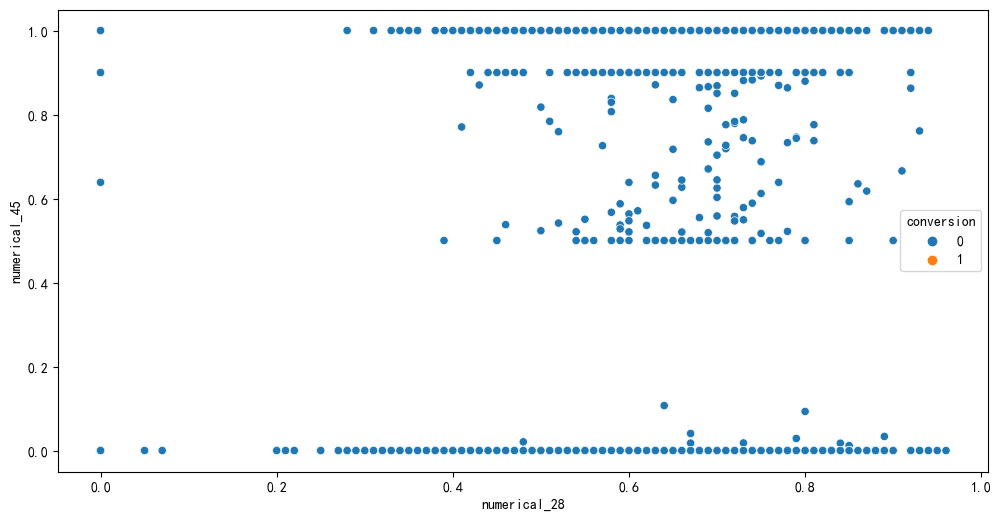

In [39]:
# auto.analyze_interaction(train_data=XY, x=y_name, y='Age', hue='Gender')
# 41, 45, 31, 28
# auto.analyze_interaction(train_data=XY, x=y_name, y='Weight', hue='Gender') # 女人本身就比男人轻，没什么好说的。 # 患病的人确实轻一点
auto.analyze_interaction(train_data=train_data, x=numeric_names[28-1], y=numeric_names[45-1], hue=y_name) 
# auto.analyze_interaction(train_data=XY, x=y_name, y='FT4', hue='Gender')

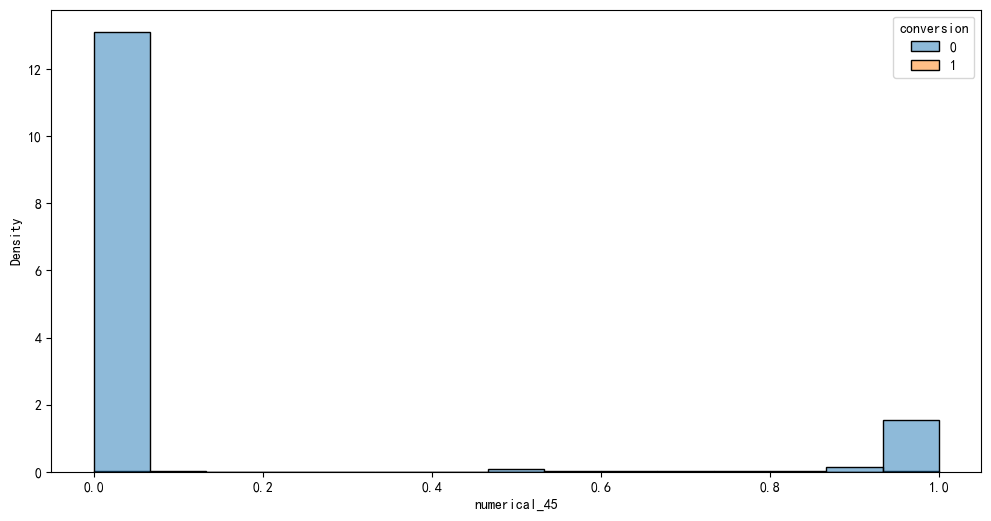

In [41]:
auto.analyze_interaction(x=numeric_names[45-1], hue=y_name, train_data=train_data)

In [43]:
# This parameter specifies how many standard deviations above mean anomaly score are considered
# to be anomalies (only needed for visualization, does not affect scores calculation).
threshold_stds = 3
auto.detect_anomalies(
    train_data=train_data,
    test_data=test_data,
    label=y_name,
    threshold_stds=threshold_stds,
    show_top_n_anomalies=None,
    fig_args={
        'figsize': (6, 4)
    },
    chart_args={
        'normal.color': 'lightgrey',
        'anomaly.color': 'orange',
    }
)

TypeError: _suod_silent_print.<locals>.silent_print() missing 1 required positional argument: 'msg_args'

## interpretable的决策树分析

In [44]:
from draw_tree import classification_and_draw, regression_and_draw
# x = math_X+answer_features+math_Y[:1]
# y = math_Y[-1]
y_learn = 0
y_name = label_names[y_learn]
X_columns = list(numeric_names)+list(cate_names)
dt = classification_and_draw(train_data[X_columns], train_data[y_name], 
                             X_columns, train_data, 
                        class_names=[f"not {y_name}", y_name], 
                        path=f"runs/analysis_fig/{y_name}", 
                        dummy_indicator="()", replacement={})


In [47]:
y_test = test_data[y_name].values
y_pred_prob = dt.predict_proba(test_data[X_columns])[:, 1]

In [64]:
import draw_metrics
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score
# draw_metrics.fast_evaluation(y_test, y_pred_prob, threshold=0.5)
# {'roc_auc': 0.75364350774827,
#  'accuracy': 0.635513820000493,
#  'balanced_accuracy': 0.6865827700885063,
#  'mcc': 0.11183493419822582,
#  'f1': 0.08031662178944289,
#  'precision': 0.042462848207854266,
#  'recall': 0.7399473421796139}
# draw_metrics.fast_evaluation(y_test, y_pred_prob, threshold=None, metric=f1_score)
# draw_metrics.fast_evaluation(y_test, y_pred_prob, threshold=None, metric=draw_metrics.f1_score)
draw_metrics.fast_evaluation(y_test[:10000], y_pred_prob[:10000], threshold=None, metric=draw_metrics.f1_score)

Trying different thresholds...:  42%|████▏     | 4240/10000 [00:04<00:06, 949.56it/s]

Trying different thresholds...: 100%|██████████| 10000/10000 [00:10<00:00, 931.98it/s]


{'roc_auc': 0.7727999687194824,
 'accuracy': 0.9451000094413757,
 'balanced_accuracy': 0.589899027627336,
 'mcc': 0.12504208087921143,
 'f1': 0.14084507524967194,
 'precision': 0.10368663817644119,
 'recall': 0.2195121943950653}

In [59]:
# draw_metrics.roc_auc_score(y_test, y_pred_prob)
%timeit draw_metrics.roc_auc_score(y_test, y_pred_prob)

19.9 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
%timeit roc_auc_score(y_test, y_pred_prob) # 加速30倍

600 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


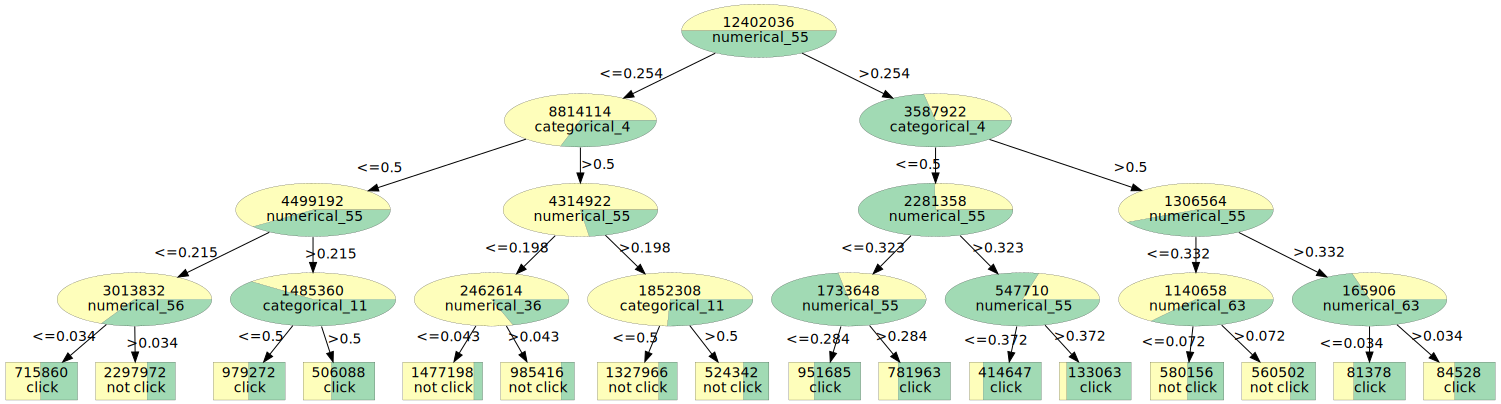

In [65]:
from PIL import Image
from IPython.display import SVG
image =SVG(f'runs/analysis_fig/{y_name}.svg')
image

## 自动机器学习分析

In [17]:
predictor = TabularPredictor(label=y_name, verbosity=2, 
                             eval_metric='roc_auc',
    # sample_weight = 'balance_weight',
    sample_weight = 'auto_weight',
                            
                             ).fit(
# predictor = TabularPredictor(label=y_name, verbosity=2, eval_metric='accuracy').fit(
    train_data, 
    tuning_data=test_data, 
    # presets='best_quality', time_limit=60*60*2, 
    # num_gpus=4
    )
# predictor = TabularPredictor(label=y_name, verbosity=0).fit(train_data, tuning_data=test_data)
res = predictor.evaluate(test_data, silent=True)
res

No path specified. Models will be saved in: "AutogluonModels/ag-20230729_152051/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230729_152051/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #83-Ubuntu SMP Thu Jun 15 19:16:32 UTC 2023
Disk Space Avail:   2564.29 GB / 3998.27 GB (64.1%)
Train Data Rows:    21699
Train Data Columns: 44
Tuning Data Rows:    5425
Tuning Data Columns: 44
Label Column: Bullae
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fit

		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', [])  : 41 | ['SBP', 'DBP', 'Weight', 'Height', 'GLU', ...]
		('int', [])    :  1 | ['Age']
		('object', []) :  2 | ['Gender', 'Province']
	Types of features in processed data (raw dtype, special dtypes):
		('category', [])  :  1 | ['Province']
		('float', [])     : 41 | ['SBP', 'DBP', 'Weight', 'Height', 'GLU', ...]
		('int', [])       :  1 | ['Age']
		('int', ['bool']) :  1 | ['Gender']
	0.2s = Fit runtime
	44 features in original data used to generate 44 features in processed data.
	Train Data (Processed) Memory Usage: 9.17 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.22s ...
AutoGluon will gauge predictive performance using evaluation metric: 'roc_auc'
	This metric expects predicted probabilities rather than predicted class labels, so you'll need to use predict_proba() instead of predict()
	To change this, specify the eval_m

{'roc_auc': 0.7297201394674317,
 'accuracy': 0.9489400921658986,
 'balanced_accuracy': 0.5,
 'mcc': 0.0,
 'f1': 0.0,
 'precision': 0.0,
 'recall': 0.0}

In [19]:
# predictor = TabularPredictor.load("AutogluonModels/ag-20230729_111437/")
# dir(predictor)
# predictor.fit_summary()
# predictor.evaluate(test_data, silent=True)
fi = predictor.feature_importance(test_data, silent=True, num_shuffle_sets=None,  include_confidence_band=True)
# predictor.leaderboard(test_data, silent=True, extra_info=True, extra_metrics=['accuracy', 'balanced_accuracy', 'mcc', 'f1', 'precision', 'recall'])

In [27]:
fi.to_csv(f'runs/analysis_fig/feature_importance_for {y_name}.csv', index=True)

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(fi.index.head(10), fi['importance'].head(10))

In [ ]:
# import autogluon.eda.auto as auto
# import autogluon.eda.analysis as eda
# import autogluon.eda.visualization as viz
# auto.analyze(model=predictor, val_data=test_data, return_state=True, anlz_facets=[
#     eda.model.AutoGluonModelEvaluator(),
# ], viz_facets=[
#     viz.model.FeatureImportance(show_barplots=True)
# ])

In [ ]:
# # import shap
# # explainer = shap.Explainer(lambda x:predictor.predict_proba(x, as_multiclass=False))
# rows_to_explain =[6748, 5082, 4730, 7721, 160, 601,9859, 1431, 2000, 3364]
# rows_to_explain = train_data.iloc[rows_to_explain]
# # # rows_to_explain
# # shap_values = explainer(rows_to_explain.values)
# # shap.summary_plot(shap_values, rows_to_explain)


# auto.analyze(
#     train_data=train_data, model=predictor,
#     anlz_facets=[
#         eda.explain.ShapAnalysis(rows_to_explain),
#     ],
#     viz_facets=[
#         viz.explain.ExplainWaterfallPlot(),
#     ]
# )



In [12]:
y_test = test_data[y_name].values
y_test
y_pred_prob = predictor.predict_proba(test_data, as_multiclass=False)
y_pred_prob[:10]

4611     0.035478
6288     0.029109
12435    0.023532
20100    0.044666
16232    0.023936
24775    0.091343
26369    0.027188
23317    0.150528
12339    0.116664
7584     0.040001
Name: Bullae, dtype: float32

In [18]:
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score
import draw_metrics
best_threshold_value, best_score = draw_metrics.best_threshold(y_test, y_pred_prob, metric=balanced_accuracy_score)
# best_threshold_value, best_score = best_threshold(y_test, y_pred_prob, metric=matthews_corrcoef)
# best_threshold_value, best_score = best_threshold(y_test, y_pred_prob)
best_threshold_value, best_score

(0.06114768981933594, 0.6689983702619082)

In [19]:
draw_metrics.fast_evaluation(y_test, y_pred_prob, threshold=best_threshold_value)

{'roc_auc': 0.7297201394674319,
 'accuracy': 0.7153917050691244,
 'balanced_accuracy': 0.6689983702619082,
 'mcc': 0.16288813871836133,
 'f1': 0.18133616118769882,
 'precision': 0.10627719080174021,
 'recall': 0.6173285198555957}

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

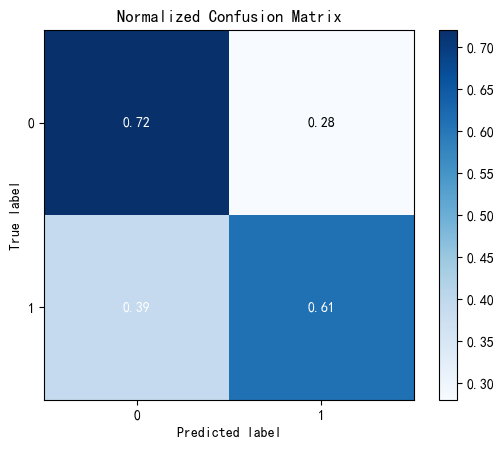

In [20]:
import scikitplot as skplt
# skplt.metrics.plot_confusion_matrix(y_test, y_pred_prob>best_threshold_value, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_prob>best_threshold_value, normalize=True)
plt.savefig(f"runs/analysis_fig/confusion_matrix_for {y_name}.png")

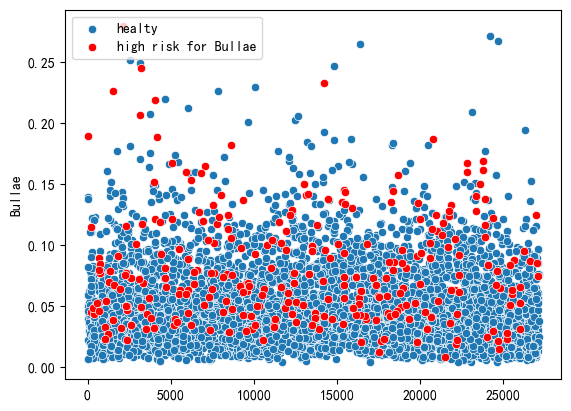

In [21]:
# sns.displot(y_pred_prob)
def draw_probs(y_pred_prob, y_test):
    sns.scatterplot(y_pred_prob[y_test==0], label=f"not {y_name}")
    sns.scatterplot(y_pred_prob[y_test==1], label=f"{y_name}", color="red")
draw_probs(y_pred_prob, y_test)
plt.savefig(f"runs/analysis_fig/prob_separate_test_for {y_name}.png")

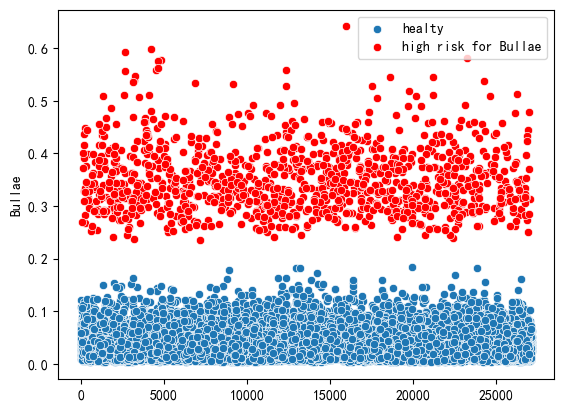

In [22]:
y_pred_train_prob = predictor.predict_proba(train_data, as_multiclass=False)
y_train = train_data[y_name].values
draw_probs(y_pred_train_prob, y_train)
plt.savefig(f"runs/analysis_fig/prob_separate_train_for {y_name}.png")

In [29]:
# 自动画图 工程
# https://zhuanlan.zhihu.com/p/372676897
# https://blog.csdn.net/wuli_xin/article/details/106612952


# 高端论文画图、动画
# https://zhuanlan.zhihu.com/p/144973329


(0.1455772984941653, <Figure size 640x480 with 1 Axes>)

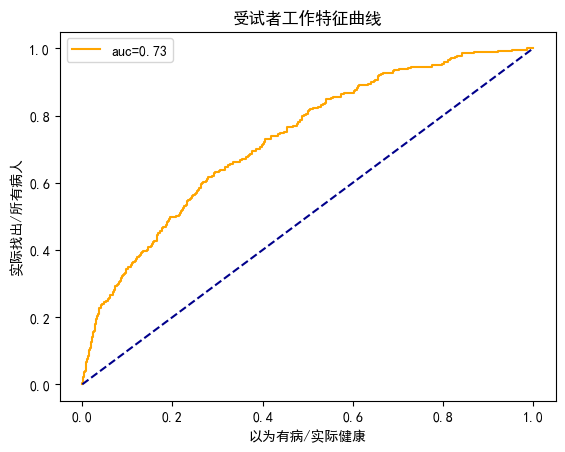

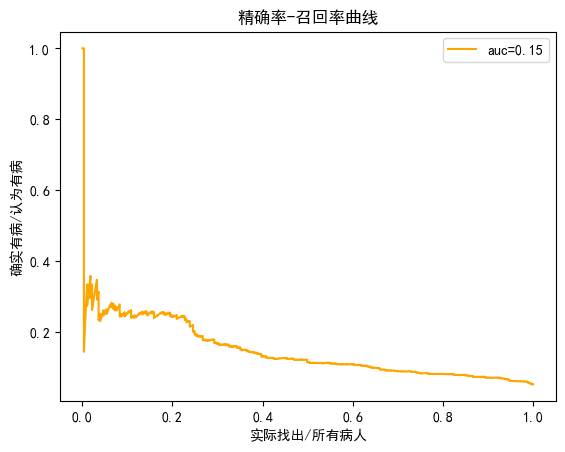

In [23]:
import draw_metrics
draw_metrics.plot_auc(y_test, y_pred_prob, xlabel="以为点击/实际没点", ylabel="实际找出/所有点击")
plt.savefig(f"runs/analysis_fig/roc_auc_plot {y_name}.png")

# https://zhuanlan.zhihu.com/p/405658103
draw_metrics.plot_pr(y_test, y_pred_prob, xlabel="实际找出/所有点击", ylabel="确实点击/认为点击")
plt.savefig(f"runs/analysis_fig/pr_auc_plot {y_name}.png")

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

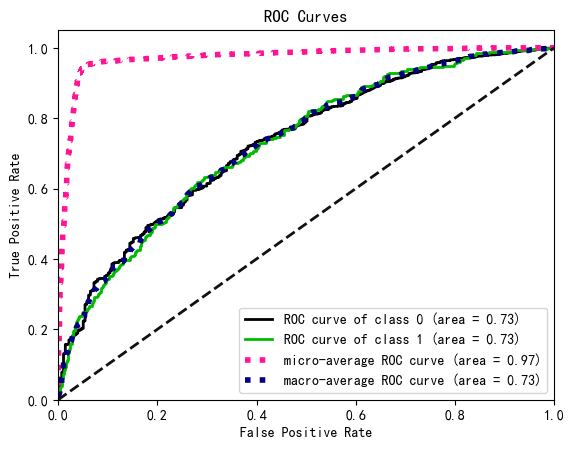

In [24]:
# scikit-plot 对结果进行可视化评估
import scikitplot as skplt
def get_skprob(binary_prob):
    return np.array([1 - binary_prob, binary_prob]).T
# skplt.metrics.plot_roc(y_test, get_skprob(y_pred_prob))

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

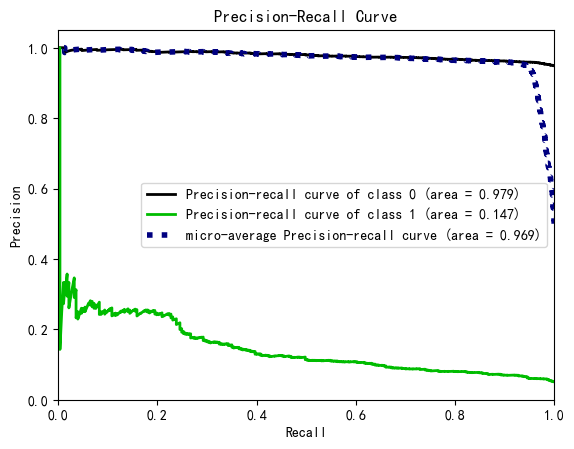

In [25]:
# skplt.metrics.plot_precision_recall(y_test, get_skprob(y_pred_prob), cmap='nipy_spectral')

In [44]:
predictor.get_model_best()

'WeightedEnsemble_L2'

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

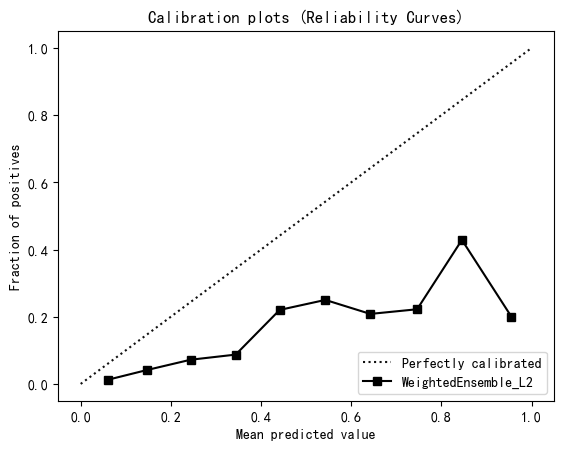

In [26]:
skplt.metrics.plot_calibration_curve(y_test,
                                     probas_list=[get_skprob(y_pred_prob)],
                                     clf_names=[predictor.get_model_best()],
                                     n_bins=10)
plt.savefig(f"runs/analysis_fig/calibration_curve {y_name}.png")

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

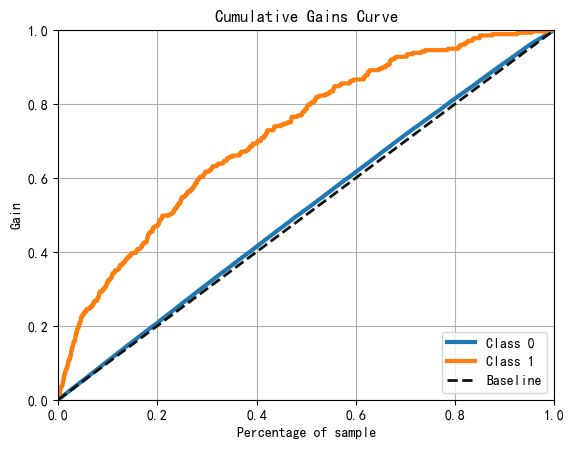

In [27]:
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas=get_skprob(y_pred_prob))
plt.savefig(f"runs/analysis_fig/cumulative_gain {y_name}.png")


<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

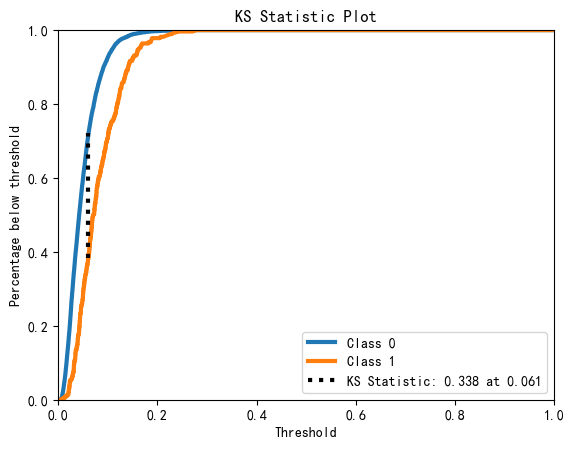

In [28]:
skplt.metrics.plot_ks_statistic(y_true=y_test, y_probas=get_skprob(y_pred_prob))
plt.savefig(f"runs/analysis_fig/ks_statistic {y_name}.png")


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

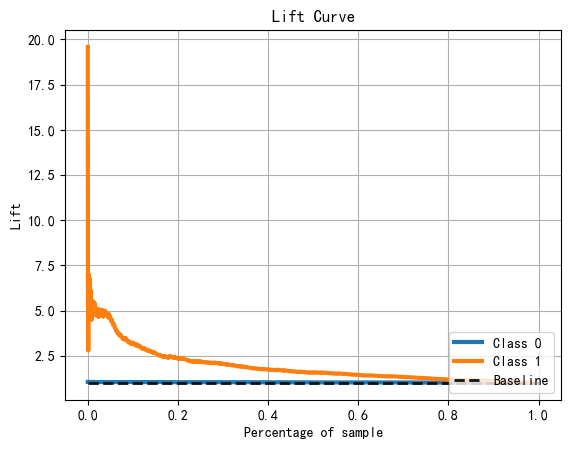

In [29]:
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=get_skprob(y_pred_prob))
plt.savefig(f"runs/analysis_fig/lift_curve {y_name}.png")


<AxesSubplot:title={'center':'PCA 2-D Projection'}, xlabel='First Principal Component', ylabel='Second Principal Component'>

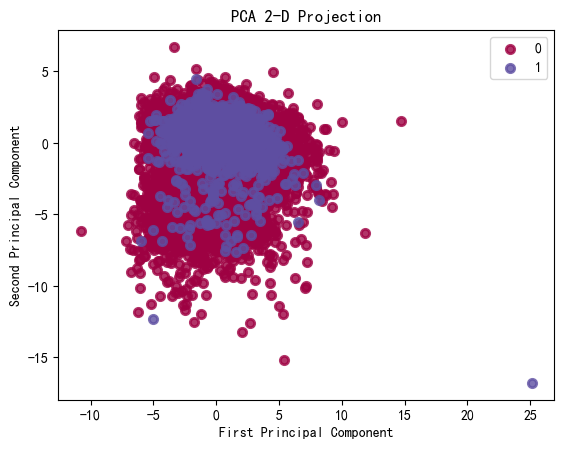

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
# https://zhuanlan.zhihu.com/p/555215223
# pca = make_pipeline(StandardScaler(), SimpleImputer(), PCA(random_state=1))
pca = make_pipeline(StandardScaler(), PCA(random_state=1))
pca.fit(train_data[numeric_names])
skplt.decomposition.plot_pca_2d_projection(pca, train_data[numeric_names], train_data[y_name])
plt.savefig(f"runs/analysis_fig/pca_2d_projection {y_name}.png")

In [48]:
# dir(pca)
pca.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler()),
 ('pca', PCA(random_state=1))]

<AxesSubplot:title={'center':'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

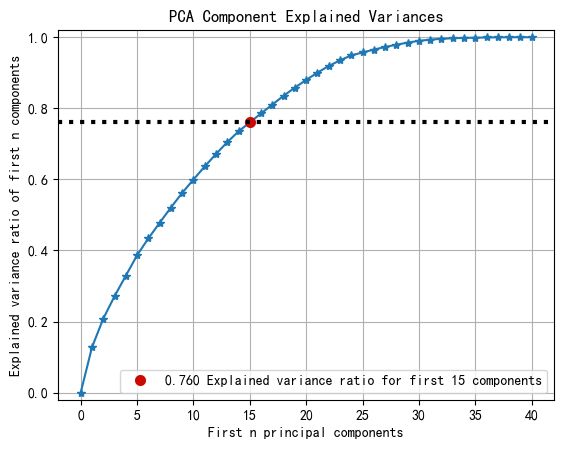

In [31]:
skplt.decomposition.plot_pca_component_variance(pca.steps[1][1])
plt.savefig(f"runs/analysis_fig/pca_component_variance {y_name}.png")